In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display, IPython.display as ipd
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (14,5)

In [3]:
N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024      # Number of audio frames between STFT columns
SR = 44100           # Sampling frequency
N_MELS = 40          # Mel band parameters   
WIN_SIZE = 1024      # number of samples in each STFT window
WINDOW_TYPE = 'hann' # the windowin function
FEATURE = 'mel'      # feature representation

# Yellowhammer

## Waveform

In [4]:
bird, sr = librosa.load("yellowhammer.wav", mono=True, sr = SR)
ipd.Audio(data=bird,rate=SR)

## Time-frequency representation

In [5]:
D_bird = librosa.stft(bird, n_fft = N_FFT, 
                      hop_length = HOP_SIZE, 
                      window = WINDOW_TYPE, 
                      win_length = WIN_SIZE)
stft_bird = np.abs(D_bird)**2

## Mal-spectrogram 

In [6]:
melspec_bird = librosa.feature.melspectrogram(y=None, 
                                              S=stft_bird, 
                                              sr=SR, 
                                              n_fft=N_FFT, 
                                              hop_length=HOP_SIZE, 
                                              n_mels=N_MELS, 
                                              htk=True, 
                                              fmin=0.0, 
                                              fmax=sr/2.0)

## Comparison

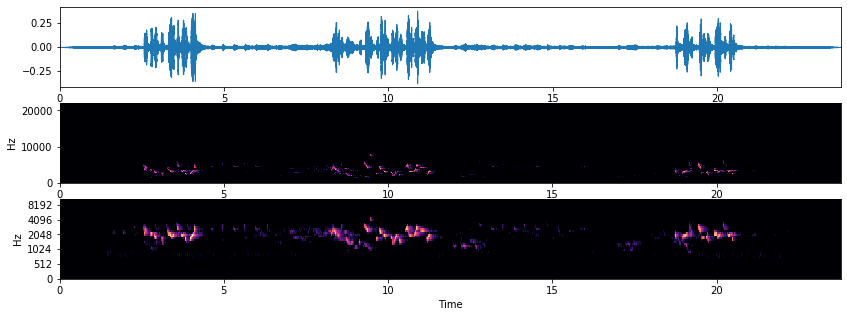

In [7]:
plt.subplot(3,1,1)
librosa.display.waveplot(bird, sr=SR)
plt.subplot(3,1,2)
librosa.display.specshow(librosa.core.amplitude_to_db(stft_bird),
                         sr=SR, 
                         hop_length=HOP_SIZE, 
                         x_axis='time', 
                         y_axis='linear')
plt.subplot(3,1,3)
librosa.display.specshow(librosa.core.amplitude_to_db(melspec_bird, ref=1.0),
                         sr=SR,
                         hop_length=HOP_SIZE, 
                         x_axis='time', 
                         y_axis='mel')

# Chiffchaff

## Waveform

In [8]:
bird2, sr2 = librosa.load("chiffchaff.wav", mono=True)
ipd.Audio(data=bird2,rate=SR)

## Time-frequency representation

In [9]:
D_bird = librosa.stft(bird2, n_fft = N_FFT, 
                      hop_length = HOP_SIZE, 
                      window = WINDOW_TYPE, 
                      win_length = WIN_SIZE)
stft_bird = np.abs(D_bird)**2

## Mal-spectrogram 

In [10]:
melspec_bird = librosa.feature.melspectrogram(y=None, 
                                              S=stft_bird, 
                                              sr=SR, 
                                              n_fft=N_FFT, 
                                              hop_length=HOP_SIZE, 
                                              n_mels=N_MELS, 
                                              htk=True, 
                                              fmin=0.0, 
                                              fmax=SR/2.0)

## Comparison

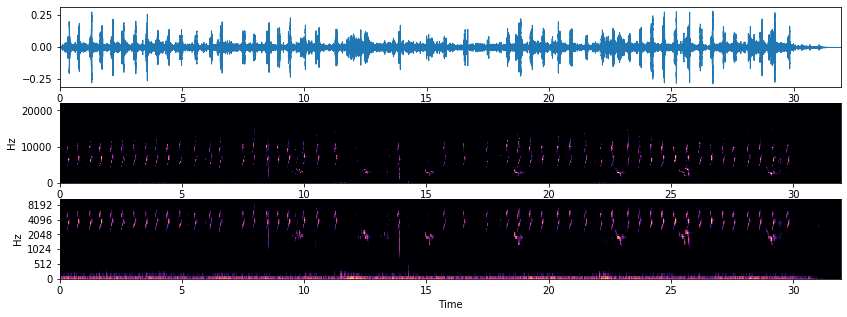

In [11]:
plt.subplot(3,1,1)
librosa.display.waveplot(bird2, sr=SR)
plt.subplot(3,1,2)
librosa.display.specshow(librosa.core.amplitude_to_db(stft_bird),
                         sr=SR, 
                         hop_length=HOP_SIZE, 
                         x_axis='time', 
                         y_axis='linear')
plt.subplot(3,1,3)
librosa.display.specshow(librosa.core.amplitude_to_db(melspec_bird, ref=1.0),
                         sr=SR,
                         hop_length=HOP_SIZE, 
                         x_axis='time', 
                         y_axis='mel')